Enter header pointer(value) 50
Enter number of requests: 5
Enter request 0 11
Enter request 1 95
Enter request 2 48
Enter request 3 22
Enter request 4 45
Enter seek time: 5


Order : [50, 11, 95, 48, 22, 45]
Tracks movememnts is : 219
Seek time : 1095ms
Graph for First Come First Serve is:


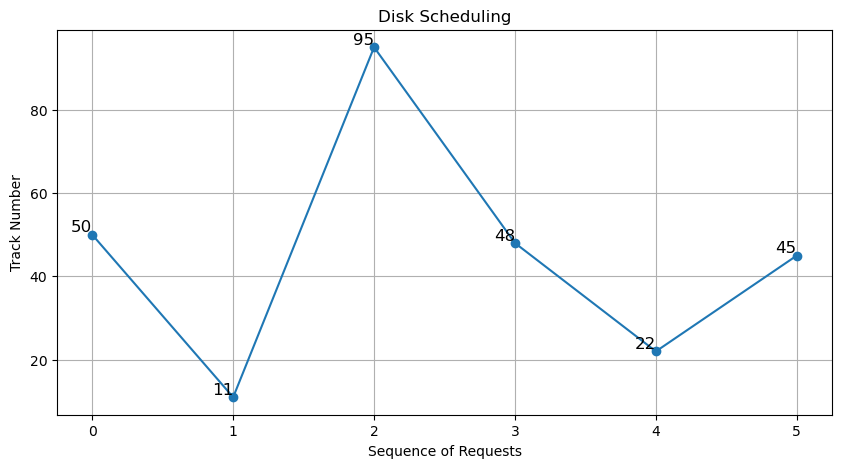

In [25]:
import matplotlib.pyplot as plt
def input_values():
    header=int(input("Enter header pointer(value)"))
    n=int(input("Enter number of requests:"))
    requests=[]
    for i in range(n):
        r=int(input(f"Enter request {i}"))
        requests.append(r)
    seek_time=int(input("Enter seek time:"))
    return header,requests,seek_time

def plot(order):  
    plt.figure(figsize=(10, 5))  
    plt.plot(range(len(order)), order, marker='o', linestyle='-')     
    plt.xlabel('Sequence of Requests')     
    plt.ylabel('Track Number')  
    plt.title('Disk Scheduling')    
    plt.grid(True)  
    
    for i, value in enumerate(order): 95
        plt.text(i, value, str(value), fontsize=12, ha='right', va='bottom') 
    
    plt.show()  

def fcfs():
    header,sequence,seek_time=input_values()
    order=[]
    tracks=0
    order.append(header)
    for i in sequence:
        tracks+=abs(header-i)
        header=i
        order.append(i)
    print(f"Order : {order}")
    print(f"Tracks movememnts is : {tracks}")
    print(f"Seek time : {tracks*seek_time}ms")
    print("Graph for First Come First Serve is:")
    plot(order)

fcfs()

Enter No. of requests:  5
Enter Header pointer(value):  50
Enter request 0:  75
Enter request 1:  25
Enter request 2:  97
Enter request 3:  18
Enter request 4:  44
Enter seek time per request: 1
Enter number of tracls/cylinders :  100


Order of requests is : [50, 75, 97, 44, 25, 18]
Track movements: 126
Seek time is : 126ms
Graph for LOOK is : 


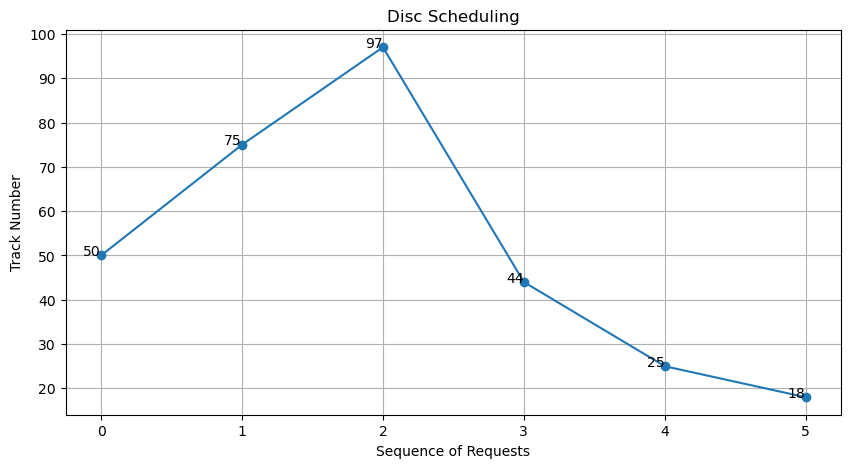

In [68]:
def input_values():
    requests=[]
    n=int(input("Enter No. of requests: "))
    header=int(input("Enter Header pointer(value): "))
    for i in range(n):
        r=int(input(f"Enter request {i}: "))
        requests.append(r)
    seek_time=int(input("Enter seek time per request:"))
    return header,requests,seek_time

def fcfs():
    tracks=0
    order=[]
    header,sequence,seek_time=input_values()
    for i in sequence:
        tracks+=abs(header-i)
        header=i
        order.append(i)
    print(f"Order of requests is : {order}")
    print("Track movements:",tracks)
    print(f"Seek time is : {seek_time*tracks}ms")
    print("Graph for FCFS is : ")
    plot(order)

def sstf():
    tracks=0
    order=[]
    header,sequence,seek_time=input_values()
    order.append(header)
    if header in sequence:
        sequence.remove(sequence)
    while sequence:
        temp=[abs(header-j) for j in sequence]
        x=temp.index(min(temp))
        header=sequence[x]
        tracks+=abs(header-sequence[x])
        order.append(sequence[x])
        sequence.remove(sequence[x])
    print(f"Order of requests is : {order}")
    print("Track movements:",tracks)
    print(f"Seek time is : {seek_time*tracks}ms")
    print("Graph for SSTF is : ")
    plot(order)

def scan():
    order=[]
    tracks=0
    header,sequence,seek_time=input_values()
    order.append(header)
    num=int(input("Enter number of tracks/cylinders : "))
    start=0
    end=num-1
    if header in sequence:
        sequence.remove(header)
    s1=[]
    s2=[]
    for i in sequence:
        if i<header:
            s1.append(i)
        else:
            s2.append(i)
    s1.sort(reverse=True)
    s2.sort()

    if abs(header-start)<abs(header-end):
        s1.append(start)
        order.extend(s1+s2)
    else:
        s2.append(end)
        order.extend(s2+s1)
    for i in order[1:]:
        tracks+=abs(header-i)
        header=i

    print(f"Order of requests is : {order}")
    print("Track movements:",tracks)
    print(f"Seek time is : {seek_time*tracks}ms")
    print("Graph for SCAN is : ")
    plot(order)

def cscan():
    tracks=0
    order=[]
    header,sequence,seek_time=input_values()
    order.append(header)
    num=int(input("Enter No. of tracks/cylinders : "))
    start=0
    end=num-1
    s1=[]
    s2=[]

    if header in sequence:
        sequence.remove(header)
    for i in sequence:
        if i<header:
            s1.append(i)
        else:
            s2.append(i)
    s1.sort(reverse=True)
    s2.sort()

    if abs(header-start)<abs(header-end):
        s1.append(start)
        order.extend(s1)
        order.append(end)
        order.extend(s2)
    else:
        s2.append(end)
        order.extend(s2)
        order.append(start)
        order.extend(s1)
    
    for i in order[1:]:
        tracks+=abs(header-i)
        header=i
    
    print(f"Order of requests is : {order}")
    print("Track movements:",tracks)
    print(f"Seek time is : {seek_time*tracks}ms")
    print("Graph for C-SCAN is : ")
    plot(order)


def look():
    header,sequence,seek_time=input_values()
    order=[]
    tracks=0
    order.append(header)
    s1=[]
    s2=[]
    num=int(input("Enter number of tracls/cylinders : "))
    start=0
    end=num-1
    if header in sequence:
        sequence.remove(header)
    for i in sequence:
        if i<header:
            s1.append(i)
        else:
            s2.append(i)
    s1.sort(reverse=True)
    s2.sort()
    if abs(header-start)<abs(header-end):
        order.extend(s1+s2)
    else:
        order.extend(s2+s1)
    for i in order:
        tracks+=abs(header-i)
        header=i
    print(f"Order of requests is : {order}")
    print("Track movements:",tracks)
    print(f"Seek time is : {seek_time*tracks}ms")
    print("Graph for LOOK is : ")
    plot(order)
def clook():
    header,sequence,seek_time=input_values()
    tracks=0
    order=[]
    order.append(header)
    if header in sequence:
        sequence.removeo(header)
    s1=[]
    s2=[]
    num=int(input("Enter Number of tracks/cylinders : "))
    start=0
    end=num-1
    for i in sequence:
        if i<header:
            s1.append(i)
        else:
            s2.append(i)
    if abs(header-start)<abs(header-end):
        s1.sort(reverse=True)
        s2.sort(reverse=True)
        # order.extend(s1+s2)
        # for i in order:
        #     tracks+=abs(header-i)
        #     header=i
        for i in s1:
            tracks+=abs(header-i)
            header=i
        headermax(s2)
        for i in s2:
            tracks+=abs(header-i)
            header=i
    else:
        s1.sort()
        s2.sort()
        # for i in order:
        #     tracks+=abs(header-i)
        #     header=i
        for i in s2:
            tracks+=abs(header-i)
            header=i
        header=min(s1)
        for i in s1:
            tracks+=abs(header-i)
            header=i
    print(f"Order of requests is : {order}")
    print("Track movements:",tracks)
    print(f"Seek time is : {seek_time*tracks}ms")
    print("Graph for C-LOOK is : ")
    plot(order)

def plot(order):
    plt.figure(figsize=(10,5))
    plt.title("Disc Scheduling")
    plt.plot(range(len(order)),order,marker='o')
    plt.xlabel('Sequence of Requests')
    plt.ylabel('Track Number')
    plt.grid(True)

    for i,value in enumerate(order):
        plt.text(x=i,y=value,s=str(value),ha='right')
    plt.show()
# fcfs()
# sstf()
# cscan()
look()

Enter the initial header position:  50
Enter the sequence of requests separated by spaces:  59 91 19 75 36
Enter the seek time:  1
Enter the number of tracks:  100


Order: [50, 59, 75, 91, 19, 36]
Number of Tracks: 58
Total Seek Time: 58 ms
Graph for CLOOK


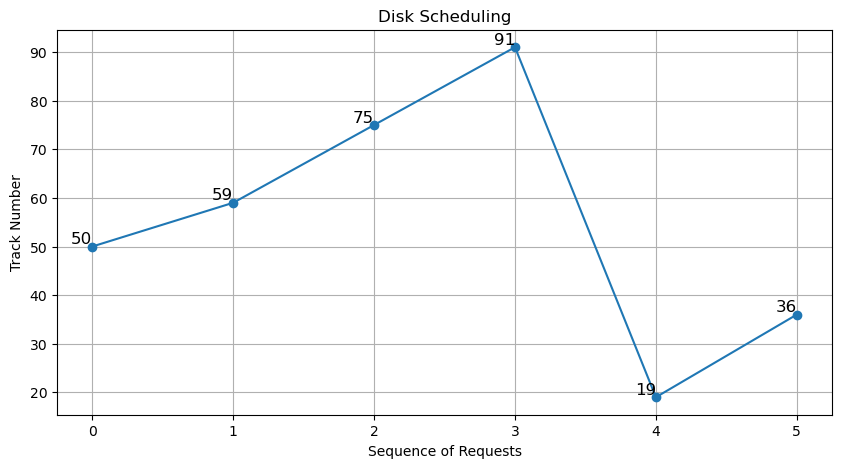

In [60]:
import matplotlib.pyplot as plt  

def fcfs():  
    header, sequence, seek_time = input_values()     
    order = []  
    tracks = 0  
    order.append(header)  
    
    for i in sequence:  
        tracks += abs(header - i) 
        header = i 
        order.append(i) 
        
    print(f"Order: {order}") 
    print(f"Number of Tracks: {tracks}") 
    print(f"Total Seek Time: {seek_time * tracks} ms")  
    print("Graph for First Come First Serve")  
    plot(order)  

def sstf():  
    header, sequence, seek_time = input_values()     
    order = []  
    tracks = 0  
    order.append(header)  
    
    if header in sequence:         
        sequence.remove(header)  
    
    while sequence:  
        temp = [abs(header - i) for i in sequence]  
        x = temp.index(min(temp))         
        tracks += abs(header - sequence[x])         
        header = sequence[x]         
        order.append(sequence[x])         
        sequence.remove(sequence[x])  
    
    print(f"Order: {order}")     
    print(f"Number of Tracks: {tracks}")     
    print(f"Total Seek Time: {seek_time * tracks} ms")     
    print("Graph for Shortest Seek Time First")  
    plot(order)  

def scan():     
    header, sequence, seek_time = input_values()     
    order = []     
    tracks = 0  
    num = int(input("Enter the number of tracks: "))     
    start = 0  
    end = num - 1     
    s1 = []     
    s2 = []  
    
    order.append(header)  
    
    if header in sequence:        
        sequence.remove(header)  
    
    for i in sequence:    
        if i < header:     
            s1.append(i) 
        else:  
            s2.append(i)  
    
    s1.sort(reverse=True) 
    s2.sort()  
    
    if abs(header - start) < abs(header - end):         
        s1.append(start)         
        order.extend(s1 + s2)     
    else:  
        s2.append(end)  
        order.extend(s2 + s1)  
    
    for i in order[1:]:         
        tracks += abs(header - i)         
        header = i  
    
    print(f"Order: {order}")     
    print(f"Number of Tracks: {tracks}")     
    print(f"Total Seek Time: {seek_time * tracks} ms")     
    print("Graph for Elevator (SCAN)")  
    plot(order)  

def cscan():     
    header, sequence, seek_time = input_values()     
    order = []     
    tracks = 0  
    num = int(input("Enter the number of tracks: "))     
    start = 0     
    end = num - 1     
    s1 = []     
    s2 = []  
    
    order.append(header)  
    
    if header in sequence:         
        sequence.remove(header)  
    
    for i in sequence:         
        if i < header:             
            s1.append(i)         
        else:  
            s2.append(i)  
    
    s1.sort(reverse=True)    
    s2.sort()  
    
    if abs(header - start) < abs(header - end):  
        s1.append(start) 
        order.extend(s1) 
        order.append(end)  
        order.extend(s2)  
    else:  
        s2.append(end)  
        order.extend(s2)         
        order.append(start)  
        order.extend(s1)  
    
    for i in order[1:]:         
        tracks += abs(header - i)  
        header = i  
    
    print(f"Order: {order}")     
    print(f"Number of Tracks: {tracks}")  
    print(f"Total Seek Time: {seek_time * tracks} ms")     
    print("Graph for Circular SCAN (CSCAN)")     
    plot(order)  

def clook():     
    header, sequence, seek_time = input_values()     
    order = []  
    tracks = 0  
    num = int(input("Enter the number of tracks: "))     
    start = 0     
    end = num - 1     
    s1 = []     
    s2 = []  
    
    order.append(header)  
    
    # Remove the initial header from the sequence if present     
    if header in sequence:  
        sequence.remove(header)  
    
    # Split the sequence into two parts: s1 for requests less than the header, s2 for greater than or equal     
    for i in sequence:         
        if i < header:             
            s1.append(i)         
        else:  
            s2.append(i)  
    
    # If the header is closer to the start than the end, prioritize s1 first, then s2    
    if abs(header - start) < abs(header - end):        
        s1.sort(reverse=True)    
        s2.sort(reverse=True)  
    
        # Process s1  
        for i in s1:  
            tracks += abs(header - i)  
            header = i         
            order.append(i)  
          
        # Jump to the max of s2 and process s2         
        header = max(s2)         
        for i in s2:  
            tracks += abs(header - i)  
            header = i             
            order.append(i)     
    else:  
        # If closer to the end, process s2 first, then s1         
        s1.sort()         
        s2.sort()  
          
        # Process s2         
        for i in s2:  
            tracks += abs(header - i)  
            header = i  
            order.append(i)  
          
        # Jump to the min of s1 and process s1         
        header = min(s1)         
        for i in s1:  
            tracks += abs(header - i)  
            header = i  
            order.append(i)  
    
    # Print the results     
    print(f"Order: {order}")     
    print(f"Number of Tracks: {tracks}")     
    print(f"Total Seek Time: {seek_time * tracks} ms")     
    print("Graph for CLOOK")  
    plot(order)  

def plot(order):  
    plt.figure(figsize=(10, 5))  
    plt.plot(range(len(order)), order, marker='o', linestyle='-')     
    plt.xlabel('Sequence of Requests')     
    plt.ylabel('Track Number')  
    plt.title('Disk Scheduling')    
    plt.grid(True)  
    
    for i, value in enumerate(order):  
        plt.text(i, value, str(value), fontsize=12, ha='right', va='bottom') 
    
    plt.show()  

def input_values():     
    header = int(input("Enter the initial header position: "))  
    sequence = list(map(int, input("Enter the sequence of requests separated by spaces: ").split()))     
    seek_time = int(input("Enter the seek time: "))     
    return header, sequence, seek_time  

# fcfs() 
# sstf() 
# scan() 
# cscan() 
clook()
